# Regression Trees & Random Forest Regression (grades)

In this notebook, we will use Regression Tree and Random Forest Regressors to predict rental apartment prices based on various features like living area, number of rooms and more. We will evaluate the models using goodness-of-fit measures like R-squared.

## Libraries and settings

In [2]:
# Libraries
import os
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/CART_RandomForest/grades


## Import the apartment data

In [5]:
# Define columns for import
columns = ['Student_ID','Branch','Grade','Study_Hours','IQ','Age','Weight','Parents_Income'
          ]

# Read and select variables
df_orig = pd.read_csv("../Data/student_grades_data.csv", sep=",", encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'Student_ID': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
#df = df.loc[(df['price'] >= 1000) & (df['price'] <= 5000)]

# Reset index
df = df.reset_index(drop=True)

print(df.shape)
df.head(5)

df.describe()

(10000, 8)


,Study_Hours,IQ,Age,Weight,Parents_Income
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,29.995800,120.16090,21.477700,75.123600,85346.111800
std,17.601272,23.42062,2.303005,14.767773,37472.101831
min,0.000000,80.00000,18.000000,50.000000,20000.000000
25%,15.000000,100.00000,19.000000,62.000000,53093.500000
50%,30.000000,120.00000,21.000000,75.000000,85873.500000
75%,45.000000,141.00000,24.000000,88.000000,118071.000000
max,60.000000,160.00000,25.000000,100.000000,149997.000000


Checking the distribution of Study_hours to make sure that I don't have extrem values. 


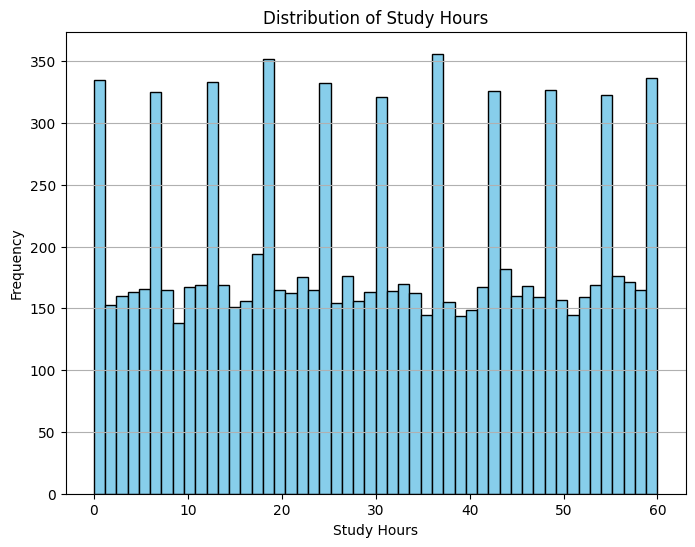

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(df['Study_Hours'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Study Hours")
plt.ylabel("Frequency")
plt.title("Distribution of Study Hours")
plt.grid(axis='y')
plt.show()

## Regression Tree
See also: https://data36.com/regression-tree-python-scikit-learn

### Create train and test samples for the regression tree (train = 80%, test = 20% of the data)

In [9]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['Study_Hours','IQ','Age','Weight']], 
                                                        df['Parents_Income'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
      Study_Hours   IQ  Age  Weight
9254           22  120   21      50
1561           60  132   24      95
1670           22  119   18      67
6087           40   81   22      53
6669           13  155   24      77 

y_train:
9254     25656
1561    140638
1670     76455
6087     61175
6669     70602
Name: Parents_Income, dtype: int64


### Fit the regression tree model

In [10]:
# Create decision tree regressor object
reg = DecisionTreeRegressor(random_state=20, max_depth=3)

# Train decision tree regressor
reg = reg.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = reg.predict(X_test)

### Calculate coefficient of determination (R-squared)

In [11]:
# Calculate coefficient of determination
print('R-squared:', round(r2_score(y_test, y_pred), 4))

R-squared: -0.0024


An 
𝑅
2
R 
2
  (R-squared) value of -0.0024 for your regression tree model indicates that the model performs worse than simply predicting the mean of the target variable for all observations. Here’s a breakdown of what this means and what you can aim for:

Interpreting 
𝑅
2
R 
2
  Value of -0.0024
Negative 
𝑅
2
R 
2
 : R-squared values generally range from 0 to 1. However, a negative 
𝑅
2
R 
2
  can occur when the model’s predictions are worse than the average (or mean) of the target variable. In this case, it suggests that the model is not capturing any meaningful pattern from the data.

Why Negative 
𝑅
2
R 
2
 ? This can happen when:

The model is underfitting (it’s too simple to capture the data’s structure).
The features do not have a meaningful relationship with the target variable, making it hard for the model to learn a useful pattern.
There could be significant noise in the data that the model cannot filter out effectively.
What is a Good 
𝑅
2
R 
2
 ?
A good 
𝑅
2
R 
2
  value depends on the context:

Close to 1: In general, an 
𝑅
2
R 
2
  closer to 1 means the model explains a large portion of the variance, which is usually ideal.
Thresholds by Field: In social sciences, an 
𝑅
2
R 
2
  around 0.3–0.5 might be acceptable, whereas in physical sciences, an 
𝑅
2
R 
2
  above 0.7 or 0.8 is often preferred.
Improving 
𝑅
2
R 
2
 
To improve 
𝑅
2
R 
2
 , try:

Feature Engineering: Create or modify features to better capture underlying patterns in the data.
Tree Depth Tuning: Increase the depth of the regression tree to reduce underfitting.
Alternative Models: If a single regression tree struggles, try ensemble methods like Random Forest or Gradient Boosting, which tend to have better performance on complex data.
A positive 
𝑅
2
R 
2
  value, ideally at least 0.3 or higher, often indicates that the model is capturing some meaningful patterns.
  

### Print text representation of the regression tree

In [12]:
# Text representation of the regression tree
text_representation = tree.export_text(reg, 
                                       feature_names=list(X_train.columns))

# Print text_representation
print(text_representation)

|--- IQ <= 152.50
|   |--- IQ <= 114.50
|   |   |--- IQ <= 113.50
|   |   |   |--- value: [85712.36]
|   |   |--- IQ >  113.50
|   |   |   |--- value: [94107.36]
|   |--- IQ >  114.50
|   |   |--- Study_Hours <= 52.50
|   |   |   |--- value: [84512.18]
|   |   |--- Study_Hours >  52.50
|   |   |   |--- value: [80850.91]
|--- IQ >  152.50
|   |--- Age <= 19.50
|   |   |--- Weight <= 87.50
|   |   |   |--- value: [77054.58]
|   |   |--- Weight >  87.50
|   |   |   |--- value: [89112.24]
|   |--- Age >  19.50
|   |   |--- Weight <= 96.50
|   |   |   |--- value: [91513.15]
|   |   |--- Weight >  96.50
|   |   |   |--- value: [77542.84]



### Vizualizing the regression tree

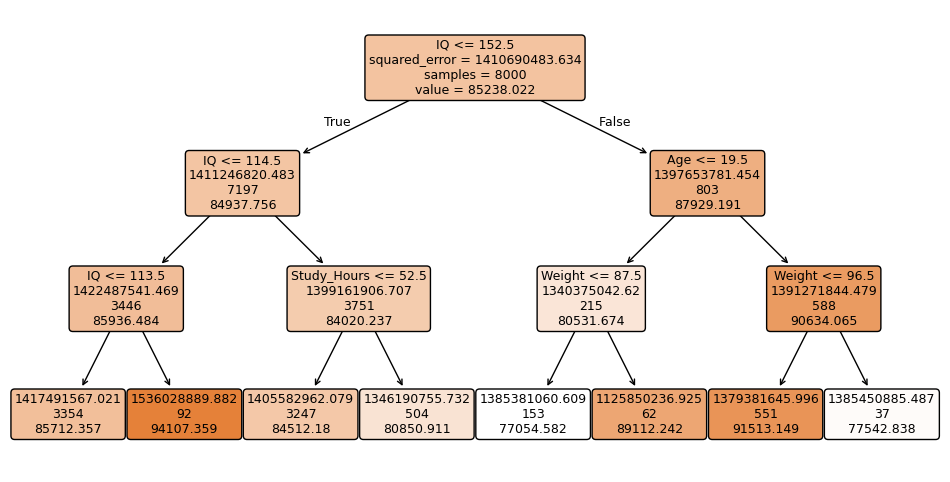

In [14]:
fig = plt.figure(figsize=(12,6))
_ = tree.plot_tree(reg, 
                   feature_names=list(X_train.columns),  
                   class_names=['Parents_Income'],
                   filled=True,
                   fontsize=9,
                   label='root',
                   rounded=True)

## Random Forest Regression
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### Create train and test samples for the random forest (train = 80%, test = 20% of the data)

In [15]:
# Create train and test samples (the names X2_ and y2_ were used because X_ and y_ were already used above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['Study_Hours','IQ','Age','Weight']],
                                                            df['Parents_Income'], 
                                                            test_size=0.20, 
                                                            random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
      Study_Hours   IQ  Age  Weight
9254           22  120   21      50
1561           60  132   24      95
1670           22  119   18      67
6087           40   81   22      53
6669           13  155   24      77 

y2_train:
9254     25656
1561    140638
1670     76455
6087     61175
6669     70602
Name: Parents_Income, dtype: int64


### Fit the Random Forest Regression

In [16]:
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=5, shuffle=False)


reg_rf = RandomForestRegressor(n_estimators=500, 
                               max_depth=10, 
                               random_state=5)
reg_rf.fit(X2_train, y2_train)

# Calculate coefficient of determination (R-squared)
print('R-squared:', round(reg_rf.score(X2_test, y2_test), 4))

R-squared: -0.0144


### Show feature importance

Index(['Study_Hours', 'IQ', 'Weight', 'Age'], dtype='object')
[0.29428068 0.28547874 0.27914222 0.14109836]


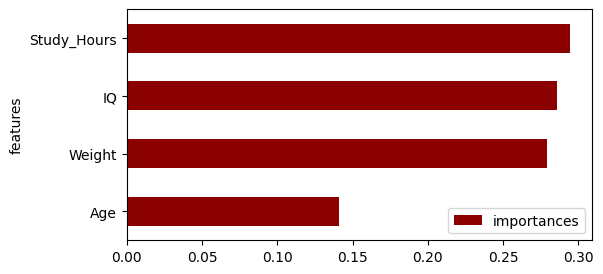

In [17]:
cols = X2_train.columns

# Derive feature importance from random forest
importances = reg_rf.feature_importances_
std         = np.std([tree.feature_importances_ for tree in reg_rf.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')